# Rent in Copenhagen
## Data analysis

This notebook is for analysing data about current apartments and rooms for rent in Copenhagen. I retrieved the data July 16, 2024, using the undocumented API from [Boligportalen](https://www.boligportal.dk/). Check the other notebook to see.

The point of the analysis is to visualise the differences in rent for rooms and apartments in Copenhagen's boroughs using both maps and graphs.

#### Questions for analysis and visualisation
- Where are the rentals?
- Which borough is the rental in?
- What is the minimum, maximum, median and mean rent in each borough?
- What is the minimum, maximum, median and mean rent PER SQ METRE in each borough?
- What is the distribution of rooms, studios, 2 room apt, etc of each neighbourhood?

#### Visualisations
The initial idea is to create these visualisations:
- Choropleth map, showing most and least expensive boroughs in rent
- Symbol map, showing the location of each rental
- Range plot, showing the cheapest and most expensive rental in each borough
    - Or maybe in each neighbourhood?
    - Or both?
- Bar chart, showing each borough and their rent prices per sq metres
- 11 histograms, showing the distribution of single, studios, 2 room apt etc. for each borough

### 1. Initial setup

In [1]:
import pandas as pd

### 2. Get data

In [2]:
df = pd.read_csv('20240721_cph_rentals.csv')

df.head()

,is_owner,is_promoted,is_open,is_exposure,url,created,advertised_date,id,rentable_id,city,...,energy_rating,locked_fields,hide_from_company_search,interactive_floor_plan_id,deleted,social_housing,is_contacted,is_newbuild,ad_phone_number,video
0,False,False,False,False,/v%C3%A6relser/k%C3%B8benhavn/18m2-1-vaer-id-5...,2023-01-21T23:01:01.271425+00:00,2024-07-21T18:29:02.796153+00:00,5332664,5380024,København,...,C,[],False,NaN,False,False,False,False,NaN,NaN
1,False,False,False,False,/v%C3%A6relser/k%C3%B8benhavn/14m2-1-vaer-id-5...,2022-02-28T10:09:59.547973+00:00,2024-07-21T17:58:51.245474+00:00,5262404,5261576,København,...,A2020,[],False,NaN,False,False,False,False,NaN,NaN
2,False,False,False,False,/lejligheder/k%C3%B8benhavn/56m2-2-vaer-id-518...,2021-05-03T16:55:30.755212+00:00,2024-07-21T14:51:34.333669+00:00,5184445,5184476,København,...,D,[],False,NaN,False,False,False,False,NaN,NaN
3,False,False,False,False,/lejligheder/k%C3%B8benhavn/111m2-4-vaer-id-54...,2024-07-21T12:00:41.599686+00:00,2024-07-21T12:03:22.882059+00:00,5447900,5531415,København,...,C,[],False,NaN,False,False,False,False,NaN,NaN
4,False,False,False,False,/v%C3%A6relser/k%C3%B8benhavn/11m2-1-vaer-id-5...,2024-07-21T10:17:52.146406+00:00,2024-07-21T10:17:52.207751+00:00,5447889,5531403,København,...,D,[],False,NaN,False,False,False,False,NaN,NaN


### 3. Getting DataFrame ready

#### Remove columns

I want to keep these columns, and get rid of all others:

```
'url': '/lejligheder/k%C3%B8benhavn/91m2-3-vaer-id-5447305',
'advertised_date': '2024-07-16T12:29:37.201699+00:00',
'id': 5447305,
'city': 'København',
'city_area': 'Glostrup',
'street_name': 'Grannålen',
'postal_code': '2600',
'description': '',
'category': 'rental_apartment',
'title': 'Helt nye lejeboliger i Glostrup! ',
'rooms': 3.0,
'size_m2': 91.0,
'monthly_rent': 13100.0,
'monthly_rent_extra_costs': 1000.0,
'location': {'lat': 55.682051, 'lng': 12.413595},
'formatted_address': None,
'floor': 1,
'rental_period': 0,
'available_from': '2024-08-15',
'social_housing': False,
'is_newbuild': False,
```

In [3]:
df = df[[
    'postal_code',
    'city_area',
    'title',
    'category',
    'size_m2',
    'rooms',
    'monthly_rent',
    'monthly_rent_extra_costs',
    'floor',
    'street_name',
    'location',
    'formatted_address',
    'advertised_date',
    'available_from',
    'rental_period',
    'social_housing',
    'is_newbuild',
    'description',
    'url',
    'id',
]]

df.head()

,postal_code,city_area,title,category,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,street_name,location,formatted_address,advertised_date,available_from,rental_period,social_housing,is_newbuild,description,url,id
0,1569,København V,Stort lyst værelse på 18 kvm med central belig...,rental_room,18.0,1.0,7000.0,0.0,4.0,Edvard Falcks Gade,"{'lat': 55.671245, 'lng': 12.571105}",NaN,2024-07-21T18:29:02.796153+00:00,2024-08-01,0,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/18m2-1-vaer-id-5...,5332664
1,2000,Frederiksberg,Værelse til leje/Frederiksberg/ydre Nørrebro t...,rental_room,14.0,1.0,4700.0,0.0,1.0,Borups Alle,"{'lat': 55.694738, 'lng': 12.529772}",NaN,2024-07-21T17:58:51.245474+00:00,2024-09-01,6,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/14m2-1-vaer-id-5...,5262404
2,2100,København Ø,"Lækker, lys indflytningsklar 2-værelses lejlig...",rental_apartment,56.0,2.0,12400.0,1100.0,2.0,Æbeløgade,"{'lat': 55.712532, 'lng': 12.561227}",NaN,2024-07-21T14:51:34.333669+00:00,2024-10-01,0,False,False,NaN,/lejligheder/k%C3%B8benhavn/56m2-2-vaer-id-518...,5184445
3,1850,Frederiksberg C,Liebhaver lejlighed i hjertet af Frederiksberg,rental_apartment,111.0,4.0,25000.0,NaN,1.0,Gammel Kongevej,"{'lat': 55.678001, 'lng': 12.534285}",NaN,2024-07-21T12:03:22.882059+00:00,NaN,6,False,False,NaN,/lejligheder/k%C3%B8benhavn/111m2-4-vaer-id-54...,5447900
4,2100,København Ø,Fantastisk beliggenhed,rental_room,11.0,1.0,5500.0,0.0,5.0,Willemoesgade,"{'lat': 55.697381, 'lng': 12.581195}",NaN,2024-07-21T10:17:52.207751+00:00,2024-08-01,12,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/11m2-1-vaer-id-5...,5447889


#### Convert to datetime

In [4]:
df['advertised_date'] = pd.to_datetime(df['advertised_date'], format='mixed', errors='coerce')
df['available_from'] = pd.to_datetime(df['available_from'], format='mixed', errors='coerce')

In [5]:
df.head()

,postal_code,city_area,title,category,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,street_name,location,formatted_address,advertised_date,available_from,rental_period,social_housing,is_newbuild,description,url,id
0,1569,København V,Stort lyst værelse på 18 kvm med central belig...,rental_room,18.0,1.0,7000.0,0.0,4.0,Edvard Falcks Gade,"{'lat': 55.671245, 'lng': 12.571105}",NaN,2024-07-21 18:29:02.796153+00:00,2024-08-01,0,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/18m2-1-vaer-id-5...,5332664
1,2000,Frederiksberg,Værelse til leje/Frederiksberg/ydre Nørrebro t...,rental_room,14.0,1.0,4700.0,0.0,1.0,Borups Alle,"{'lat': 55.694738, 'lng': 12.529772}",NaN,2024-07-21 17:58:51.245474+00:00,2024-09-01,6,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/14m2-1-vaer-id-5...,5262404
2,2100,København Ø,"Lækker, lys indflytningsklar 2-værelses lejlig...",rental_apartment,56.0,2.0,12400.0,1100.0,2.0,Æbeløgade,"{'lat': 55.712532, 'lng': 12.561227}",NaN,2024-07-21 14:51:34.333669+00:00,2024-10-01,0,False,False,NaN,/lejligheder/k%C3%B8benhavn/56m2-2-vaer-id-518...,5184445
3,1850,Frederiksberg C,Liebhaver lejlighed i hjertet af Frederiksberg,rental_apartment,111.0,4.0,25000.0,NaN,1.0,Gammel Kongevej,"{'lat': 55.678001, 'lng': 12.534285}",NaN,2024-07-21 12:03:22.882059+00:00,NaT,6,False,False,NaN,/lejligheder/k%C3%B8benhavn/111m2-4-vaer-id-54...,5447900
4,2100,København Ø,Fantastisk beliggenhed,rental_room,11.0,1.0,5500.0,0.0,5.0,Willemoesgade,"{'lat': 55.697381, 'lng': 12.581195}",NaN,2024-07-21 10:17:52.207751+00:00,2024-08-01,12,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/11m2-1-vaer-id-5...,5447889


In [6]:
# I have 95 rentals in Frederiksberg
# They are not in the GeoJSON data, but I need to keep them in the DataFrame

df[df['city_area'].str.contains("Frederiksberg")]

,postal_code,city_area,title,category,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,street_name,location,formatted_address,advertised_date,available_from,rental_period,social_housing,is_newbuild,description,url,id
1,2000,Frederiksberg,Værelse til leje/Frederiksberg/ydre Nørrebro t...,rental_room,14.0,1.0,4700.0,0.0,1.0,Borups Alle,"{'lat': 55.694738, 'lng': 12.529772}",NaN,2024-07-21 17:58:51.245474+00:00,2024-09-01,6,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/14m2-1-vaer-id-5...,5262404
3,1850,Frederiksberg C,Liebhaver lejlighed i hjertet af Frederiksberg,rental_apartment,111.0,4.0,25000.0,NaN,1.0,Gammel Kongevej,"{'lat': 55.678001, 'lng': 12.534285}",NaN,2024-07-21 12:03:22.882059+00:00,NaT,6,False,False,NaN,/lejligheder/k%C3%B8benhavn/111m2-4-vaer-id-54...,5447900
5,1817,Frederiksberg C,Stor 1 værelses på Frederiksberg C! Tæt på alt...,rental_apartment,51.0,1.0,8450.0,859.0,1.0,Carl Bernhards Vej,"{'lat': 55.671765, 'lng': 12.542728}",NaN,2024-07-21 08:23:54.426675+00:00,2024-09-15,24,False,False,NaN,/lejligheder/k%C3%B8benhavn/51m2-1-vaer-id-544...,5446170
14,2000,Frederiksberg,Værelse til leje Frederiksberg,rental_room,15.0,1.0,6500.0,0.0,2.0,Nordre Fasanvej,"{'lat': 55.679569, 'lng': 12.521289}",NaN,2024-07-20 09:41:39.738927+00:00,NaT,0,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/15m2-1-vaer-id-5...,5447858
18,2000,Frederiksberg,Lyst værelse udlejes,rental_room,13.0,1.0,4000.0,0.0,2.0,Solbjerg Have,"{'lat': 55.683328, 'lng': 12.506666}",NaN,2024-07-20 07:57:35.448967+00:00,2024-08-05,6,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/13m2-1-vaer-id-4...,4497770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,2000,Frederiksberg,Lejer et værelse på Frederiksberg,rental_room,20.0,1.0,6000.0,0.0,2.0,Dalgas Have,"{'lat': 55.684601, 'lng': 12.516258}",NaN,2024-01-11 12:07:31.024499+00:00,2024-02-01,6,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/20m2-1-vaer-id-5...,5411825
1939,1879,Frederiksberg C,Skøn lejlighed på Frederiksberg C,rental_apartment,157.0,5.0,23500.0,NaN,4.0,H.C. Ørsteds Vej,"{'lat': 55.681801, 'lng': 12.549757}",NaN,2024-01-09 10:25:13.556594+00:00,2024-07-19,12,False,False,NaN,/lejligheder/k%C3%B8benhavn/157m2-5-vaer-id-52...,5264312
1976,1879,Frederiksberg C,Sunny room for rent,rental_room,16.0,1.0,6000.0,0.0,4.0,H.C. Ørsteds Vej,"{'lat': 55.677631, 'lng': 12.547495}",NaN,2023-11-27 09:10:33.017482+00:00,NaT,6,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/16m2-1-vaer-id-5...,5402215
1991,2000,Frederiksberg,Dejlig nyistandsat 3-værelses stuelejlighed på...,rental_apartment,98.0,3.0,18500.0,0.0,0.0,Finsensvej,"{'lat': 55.680706, 'lng': 12.51919}",NaN,2023-10-02 14:14:35.321960+00:00,NaT,24,False,False,NaN,/lejligheder/k%C3%B8benhavn/98m2-3-vaer-id-510...,5101431


#### Make 'borough' column

When I want to make a choropleth map, I need every rental to have the correct borough as an attribute. Using geopandas to do that.

In [7]:
# Convert the values in 'location' column from str to dict

import ast

df['location'] = df['location'].apply(ast.literal_eval)

In [8]:
import geopandas as gpd
from shapely.geometry import Point

# Make new DataFrame to prepare for making a GeoDataFrame
geodf = df[[
    'location',
    'id'
]].copy()

# Get latitude and longitude from the 'location' column
geodf.loc[:, 'lat'] = geodf['location'].apply(lambda x: x['lat'])
geodf.loc[:, 'lng'] = geodf['location'].apply(lambda x: x['lng'])

# Convert to GeoDataFrame
geodf = gpd.GeoDataFrame(geodf, geometry=gpd.points_from_xy(geodf.lng, geodf.lat), crs="EPSG:4326")

In [9]:
geodf.head()

,location,id,lat,lng,geometry
0,"{'lat': 55.671245, 'lng': 12.571105}",5332664,55.671245,12.571105,POINT (12.5711 55.67124)
1,"{'lat': 55.694738, 'lng': 12.529772}",5262404,55.694738,12.529772,POINT (12.52977 55.69474)
2,"{'lat': 55.712532, 'lng': 12.561227}",5184445,55.712532,12.561227,POINT (12.56123 55.71253)
3,"{'lat': 55.678001, 'lng': 12.534285}",5447900,55.678001,12.534285,POINT (12.53428 55.678)
4,"{'lat': 55.697381, 'lng': 12.581195}",5447889,55.697381,12.581195,POINT (12.5812 55.69738)


In [10]:
# Load the GeoJSON file
boroughs = gpd.read_file('bydele-kbh.geojson')

# Perform the spatial join
geodf = gpd.sjoin(geodf, boroughs, how="left", predicate='within')

# Rename the column with borough names
geodf = geodf.rename(columns={'navn': 'borough'})  # Adjust 'navn' to your GeoJSON file's column name for boroughs

In [11]:
geodf.head()

,location,id_left,lat,lng,geometry,index_right,id_right,bydel_nr,borough,areal_m2,ogc_fid
0,"{'lat': 55.671245, 'lng': 12.571105}",5332664,55.671245,12.571105,POINT (12.5711 55.67124),3.0,1.0,1.0,Indre By,10471832.0,4.0
1,"{'lat': 55.694738, 'lng': 12.529772}",5262404,55.694738,12.529772,POINT (12.52977 55.69474),NaN,NaN,NaN,NaN,NaN,NaN
2,"{'lat': 55.712532, 'lng': 12.561227}",5184445,55.712532,12.561227,POINT (12.56123 55.71253),4.0,2.0,2.0,Østerbro,9772935.0,5.0
3,"{'lat': 55.678001, 'lng': 12.534285}",5447900,55.678001,12.534285,POINT (12.53428 55.678),NaN,NaN,NaN,NaN,NaN,NaN
4,"{'lat': 55.697381, 'lng': 12.581195}",5447889,55.697381,12.581195,POINT (12.5812 55.69738),4.0,2.0,2.0,Østerbro,9772935.0,5.0


In [12]:
# Check column names in geodf
print(geodf.columns)

# Check column names in df before merging
print(df.columns)

Index(['location', 'id_left', 'lat', 'lng', 'geometry', 'index_right',
       'id_right', 'bydel_nr', 'borough', 'areal_m2', 'ogc_fid'],
      dtype='object')
Index(['postal_code', 'city_area', 'title', 'category', 'size_m2', 'rooms',
       'monthly_rent', 'monthly_rent_extra_costs', 'floor', 'street_name',
       'location', 'formatted_address', 'advertised_date', 'available_from',
       'rental_period', 'social_housing', 'is_newbuild', 'description', 'url',
       'id'],
      dtype='object')


In [13]:
df = pd.merge(df, geodf[['id_left', 'borough', 'lat', 'lng']], left_on='id', right_on='id_left', how='left', suffixes=('', '_geodf'))


In [14]:
df.head()

,postal_code,city_area,title,category,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,street_name,...,rental_period,social_housing,is_newbuild,description,url,id,id_left,borough,lat,lng
0,1569,København V,Stort lyst værelse på 18 kvm med central belig...,rental_room,18.0,1.0,7000.0,0.0,4.0,Edvard Falcks Gade,...,0,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/18m2-1-vaer-id-5...,5332664,5332664,Indre By,55.671245,12.571105
1,2000,Frederiksberg,Værelse til leje/Frederiksberg/ydre Nørrebro t...,rental_room,14.0,1.0,4700.0,0.0,1.0,Borups Alle,...,6,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/14m2-1-vaer-id-5...,5262404,5262404,NaN,55.694738,12.529772
2,2100,København Ø,"Lækker, lys indflytningsklar 2-værelses lejlig...",rental_apartment,56.0,2.0,12400.0,1100.0,2.0,Æbeløgade,...,0,False,False,NaN,/lejligheder/k%C3%B8benhavn/56m2-2-vaer-id-518...,5184445,5184445,Østerbro,55.712532,12.561227
3,1850,Frederiksberg C,Liebhaver lejlighed i hjertet af Frederiksberg,rental_apartment,111.0,4.0,25000.0,NaN,1.0,Gammel Kongevej,...,6,False,False,NaN,/lejligheder/k%C3%B8benhavn/111m2-4-vaer-id-54...,5447900,5447900,NaN,55.678001,12.534285
4,2100,København Ø,Fantastisk beliggenhed,rental_room,11.0,1.0,5500.0,0.0,5.0,Willemoesgade,...,12,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/11m2-1-vaer-id-5...,5447889,5447889,Østerbro,55.697381,12.581195


In [15]:
df = df.drop(columns=['id_left'])

In [16]:
df.head()

,postal_code,city_area,title,category,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,street_name,...,available_from,rental_period,social_housing,is_newbuild,description,url,id,borough,lat,lng
0,1569,København V,Stort lyst værelse på 18 kvm med central belig...,rental_room,18.0,1.0,7000.0,0.0,4.0,Edvard Falcks Gade,...,2024-08-01,0,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/18m2-1-vaer-id-5...,5332664,Indre By,55.671245,12.571105
1,2000,Frederiksberg,Værelse til leje/Frederiksberg/ydre Nørrebro t...,rental_room,14.0,1.0,4700.0,0.0,1.0,Borups Alle,...,2024-09-01,6,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/14m2-1-vaer-id-5...,5262404,NaN,55.694738,12.529772
2,2100,København Ø,"Lækker, lys indflytningsklar 2-værelses lejlig...",rental_apartment,56.0,2.0,12400.0,1100.0,2.0,Æbeløgade,...,2024-10-01,0,False,False,NaN,/lejligheder/k%C3%B8benhavn/56m2-2-vaer-id-518...,5184445,Østerbro,55.712532,12.561227
3,1850,Frederiksberg C,Liebhaver lejlighed i hjertet af Frederiksberg,rental_apartment,111.0,4.0,25000.0,NaN,1.0,Gammel Kongevej,...,NaT,6,False,False,NaN,/lejligheder/k%C3%B8benhavn/111m2-4-vaer-id-54...,5447900,NaN,55.678001,12.534285
4,2100,København Ø,Fantastisk beliggenhed,rental_room,11.0,1.0,5500.0,0.0,5.0,Willemoesgade,...,2024-08-01,12,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/11m2-1-vaer-id-5...,5447889,Østerbro,55.697381,12.581195


In [17]:
df = df[[
    'postal_code',
    'city_area',
    'borough',
    'title',
    'category',
    'size_m2',
    'rooms',
    'monthly_rent',
    'monthly_rent_extra_costs',
    'floor',
    'street_name',
    'lat',
    'lng',
    'formatted_address',
    'advertised_date',
    'available_from',
    'rental_period',
    'social_housing',
    'is_newbuild',
    'description',
    'url',
    'id',
]]

df.head()

,postal_code,city_area,borough,title,category,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,...,lng,formatted_address,advertised_date,available_from,rental_period,social_housing,is_newbuild,description,url,id
0,1569,København V,Indre By,Stort lyst værelse på 18 kvm med central belig...,rental_room,18.0,1.0,7000.0,0.0,4.0,...,12.571105,NaN,2024-07-21 18:29:02.796153+00:00,2024-08-01,0,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/18m2-1-vaer-id-5...,5332664
1,2000,Frederiksberg,NaN,Værelse til leje/Frederiksberg/ydre Nørrebro t...,rental_room,14.0,1.0,4700.0,0.0,1.0,...,12.529772,NaN,2024-07-21 17:58:51.245474+00:00,2024-09-01,6,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/14m2-1-vaer-id-5...,5262404
2,2100,København Ø,Østerbro,"Lækker, lys indflytningsklar 2-værelses lejlig...",rental_apartment,56.0,2.0,12400.0,1100.0,2.0,...,12.561227,NaN,2024-07-21 14:51:34.333669+00:00,2024-10-01,0,False,False,NaN,/lejligheder/k%C3%B8benhavn/56m2-2-vaer-id-518...,5184445
3,1850,Frederiksberg C,NaN,Liebhaver lejlighed i hjertet af Frederiksberg,rental_apartment,111.0,4.0,25000.0,NaN,1.0,...,12.534285,NaN,2024-07-21 12:03:22.882059+00:00,NaT,6,False,False,NaN,/lejligheder/k%C3%B8benhavn/111m2-4-vaer-id-54...,5447900
4,2100,København Ø,Østerbro,Fantastisk beliggenhed,rental_room,11.0,1.0,5500.0,0.0,5.0,...,12.581195,NaN,2024-07-21 10:17:52.207751+00:00,2024-08-01,12,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/11m2-1-vaer-id-5...,5447889


In [18]:
# Keep Frederiksberg rentals
df.loc[df['city_area'].str.contains("Frederiksberg"), 'borough'] = 'Frederiksberg'

# Then drop all rentals that aren't in Copenhagen
df = df.dropna(subset=["borough"])

# Check DataFrame
df['borough'].value_counts()

borough
Amager Vest                  216
Indre By                     136
Valby                        125
Vesterbro-Kongens Enghave    106
Frederiksberg                101
Amager Øst                    94
Østerbro                      93
Brønshøj-Husum                48
Bispebjerg                    39
Nørrebro                      39
Vanløse                       35
Name: count, dtype: int64

### 4. Exploratory data analysis

In [19]:
# How many rooms, and how many apartments?

df['category'].value_counts()

category
rental_apartment    841
rental_room         191
Name: count, dtype: int64

In [20]:
# See how the 'rental_room' data looks
df[df['category'] == 'rental_room'].head()

,postal_code,city_area,borough,title,category,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,...,lng,formatted_address,advertised_date,available_from,rental_period,social_housing,is_newbuild,description,url,id
0,1569,København V,Indre By,Stort lyst værelse på 18 kvm med central belig...,rental_room,18.0,1.0,7000.0,0.0,4.0,...,12.571105,NaN,2024-07-21 18:29:02.796153+00:00,2024-08-01,0,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/18m2-1-vaer-id-5...,5332664
1,2000,Frederiksberg,Frederiksberg,Værelse til leje/Frederiksberg/ydre Nørrebro t...,rental_room,14.0,1.0,4700.0,0.0,1.0,...,12.529772,NaN,2024-07-21 17:58:51.245474+00:00,2024-09-01,6,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/14m2-1-vaer-id-5...,5262404
4,2100,København Ø,Østerbro,Fantastisk beliggenhed,rental_room,11.0,1.0,5500.0,0.0,5.0,...,12.581195,NaN,2024-07-21 10:17:52.207751+00:00,2024-08-01,12,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/11m2-1-vaer-id-5...,5447889
6,2300,København S,Amager Vest,15 m2 i starten af Amager,rental_room,15.0,1.0,6500.0,0.0,5.0,...,12.598308,NaN,2024-07-21 08:07:09.351245+00:00,2024-08-01,0,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/15m2-1-vaer-id-5...,5381282
12,2700,Brønshøj,Brønshøj-Husum,Route,rental_room,20.0,1.0,2800.0,1000.0,2.0,...,12.485363,NaN,2024-07-20 16:13:59.164021+00:00,2024-09-01,6,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/20m2-1-vaer-id-5...,5153512


In [21]:
# Summary statistics for apartments
df[df['category'] == 'rental_apartment'].describe()

,postal_code,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,lat,lng,formatted_address,available_from,rental_period,description,id
count,841.000000,841.000000,841.00000,841.000000,806.000000,825.000000,841.000000,841.000000,0.0,757,841.000000,0.0,8.410000e+02
mean,2178.498216,81.587990,2.46849,15339.118680,889.834057,2.665455,55.669258,12.558556,NaN,2024-08-13 20:02:13.157199360,3.602854,NaN,5.272220e+06
min,1051.000000,25.000000,1.00000,5500.000000,0.000000,-1.000000,55.616310,12.459875,NaN,2022-10-01 00:00:00,0.000000,NaN,8.698030e+05
25%,2100.000000,42.000000,1.00000,9500.000000,550.000000,1.000000,55.651555,12.519190,NaN,2024-07-19 00:00:00,0.000000,NaN,5.288009e+06
50%,2300.000000,75.000000,2.00000,14000.000000,800.000000,2.000000,55.666845,12.567750,NaN,2024-08-31 00:00:00,0.000000,NaN,5.429507e+06
75%,2450.000000,105.000000,3.00000,18000.000000,1100.000000,4.000000,55.685973,12.587434,NaN,2024-09-30 00:00:00,6.000000,NaN,5.444409e+06
max,2900.000000,421.000000,8.00000,60000.000000,9000.000000,20.000000,55.731307,12.637565,NaN,2025-06-01 00:00:00,24.000000,NaN,5.447900e+06
std,407.564599,47.589708,1.24853,7767.173763,641.228745,2.305982,0.025975,0.040565,NaN,NaN,7.116660,NaN,4.277823e+05


<Axes: ylabel='Frequency'>

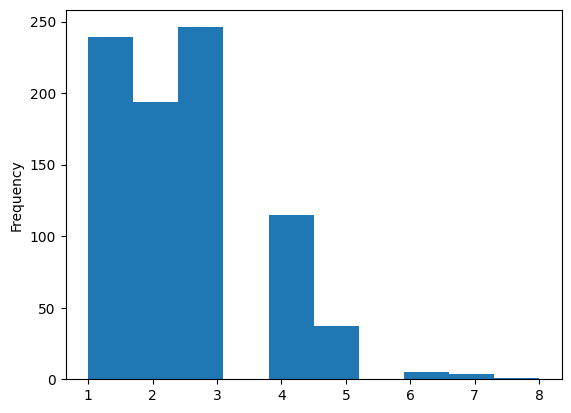

In [22]:
# Distribution of number of rooms in apartments
df[df['category'] == 'rental_apartment']['rooms'].plot(kind='hist')

<Axes: ylabel='Frequency'>

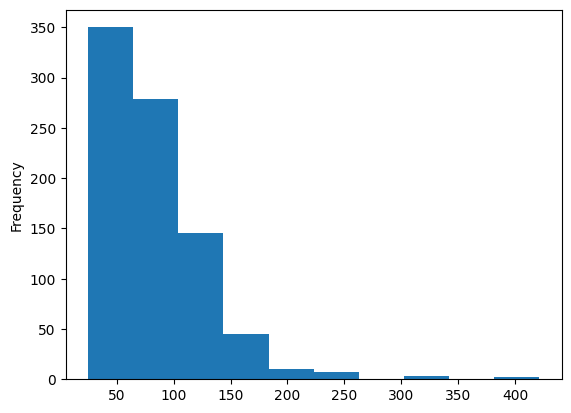

In [23]:
# Distribution of sq metres in apartments
df[df['category'] == 'rental_apartment']['size_m2'].plot(kind='hist')

<Axes: ylabel='Frequency'>

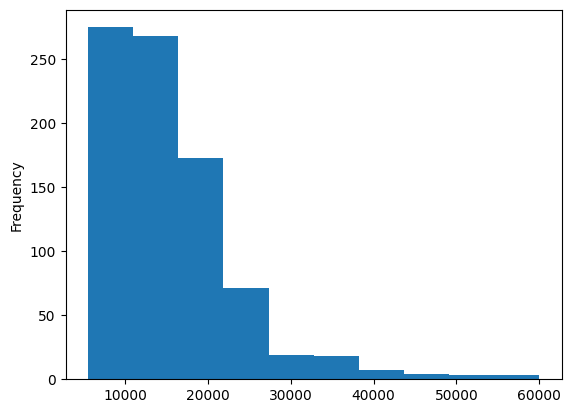

In [24]:
# Distribution of rent in apartments
df[df['category'] == 'rental_apartment']['monthly_rent'].plot(kind='hist')

In [25]:
# Summary statistics for rooms
df[df['category'] == 'rental_room'].describe()

,postal_code,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,lat,lng,formatted_address,available_from,rental_period,description,id
count,191.000000,191.000000,191.000000,191.000000,191.000000,172.000000,191.000000,191.000000,0.0,126,191.000000,0.0,1.910000e+02
mean,2125.167539,16.867016,1.036649,6341.316283,280.825916,2.790698,55.678185,12.552902,NaN,2024-03-23 09:20:00,4.712042,NaN,5.249388e+06
min,1112.000000,6.000000,1.000000,2500.000000,0.000000,0.000000,55.617719,12.457141,NaN,2019-09-02 00:00:00,0.000000,NaN,1.813113e+06
25%,1955.500000,12.000000,1.000000,5050.000000,0.000000,1.000000,55.662968,12.531303,NaN,2024-06-22 00:00:00,0.000000,NaN,5.242057e+06
50%,2200.000000,15.000000,1.000000,6000.000000,0.000000,3.000000,55.678370,12.554406,NaN,2024-08-01 00:00:00,0.000000,NaN,5.406950e+06
75%,2400.000000,20.000000,1.000000,7125.000000,400.000000,4.000000,55.695048,12.578974,NaN,2024-08-16 12:00:00,6.000000,NaN,5.443802e+06
max,2900.000000,80.000000,2.000000,14200.000000,6200.000000,27.000000,55.728538,12.623747,NaN,2024-11-01 00:00:00,24.000000,NaN,5.447889e+06
std,376.717251,8.689953,0.188393,1897.068894,771.759332,2.543729,0.022485,0.036481,NaN,NaN,6.310877,NaN,4.468612e+05


<Axes: ylabel='Frequency'>

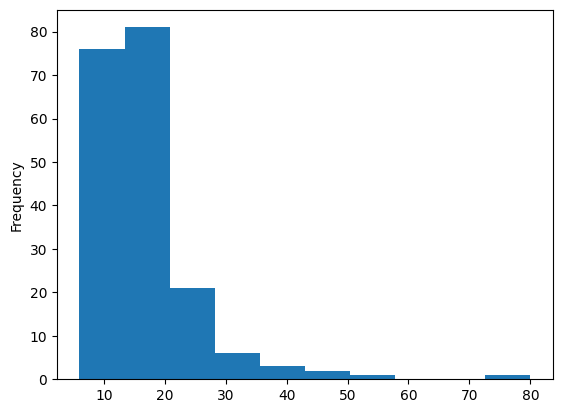

In [26]:
# Distribution of sq metres in rooms
df[df['category'] == 'rental_room']['size_m2'].plot(kind='hist')

<Axes: ylabel='Frequency'>

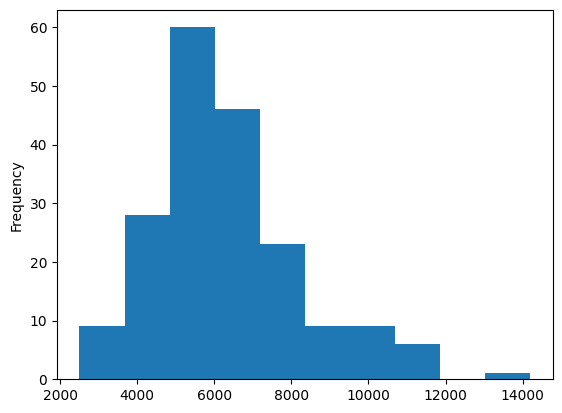

In [27]:
# Distribution of rent in rooms
df[df['category'] == 'rental_room']['monthly_rent'].plot(kind='hist')

In [28]:
# Check rooms for rental with 'rooms' > 1

# Show more content in columns
pd.set_option('display.max_colwidth', None)

df[(df['category'] == 'rental_room') & (df['rooms'] > 1)]

# Okay, so it looks like they are still only a part of an apartment being rented out,
# with shared kitchen and bathroom, but with 2 or 2,5 rooms in the rental instead of just one.

,postal_code,city_area,borough,title,category,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,...,lng,formatted_address,advertised_date,available_from,rental_period,social_housing,is_newbuild,description,url,id
42,1957,Frederiksberg C,Frederiksberg,2 værelser udlejes på frederiksberg,rental_room,30.0,2.0,6400.0,0.0,4.0,...,12.540802,NaN,2024-07-19 11:29:20.140734+00:00,2024-09-01,0,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/30m2-2-vaer-id-5447803,5447803
61,1620,København V,Vesterbro-Kongens Enghave,Vesterbro with CPR - 2 rooms ensuite,rental_room,36.0,2.0,11200.0,0.0,3.0,...,12.556944,NaN,2024-07-19 07:23:39.746385+00:00,NaT,6,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/36m2-2-vaer-id-5447767,5447767
139,2000,Frederiksberg,Frederiksberg,To møblerede værelser udlejes,rental_room,80.0,2.0,11000.0,0.0,2.0,...,12.530559,NaN,2024-07-17 18:33:44.138254+00:00,NaT,0,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/80m2-2-vaer-id-5383528,5383528
661,2100,København Ø,Østerbro,Delelejlighed,rental_room,45.0,2.0,8000.0,1000.0,2.0,...,12.573125,NaN,2024-07-03 15:44:30.039569+00:00,NaT,0,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/45m2-2-vaer-id-5445405,5445405
775,2700,Brønshøj,Brønshøj-Husum,2 værelser i Brønshøj.,rental_room,31.0,2.0,8000.0,0.0,1.0,...,12.509681,NaN,2024-07-01 09:07:06.517478+00:00,NaT,6,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/31m2-2-vaer-id-5444860,5444860
1334,1171,København K,Indre By,Halv lejlighed/ to sammenhængende værelser udlejes i indre by!,rental_room,55.0,2.0,10500.0,500.0,1.0,...,12.572460,NaN,2024-05-28 12:00:24.676360+00:00,2021-07-01,0,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/55m2-2-vaer-id-5197199,5197199
1453,2700,Brønshøj,Brønshøj-Husum,"2,5 værelse",rental_room,43.0,2.0,7300.0,0.0,NaN,...,12.491873,NaN,2024-05-18 12:42:59.672060+00:00,2024-07-14,0,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/43m2-2-vaer-id-5243309,5243309


In [29]:
# Change 'rooms' from 1.0 to 0.0 for 'rental_rooms'
# so I can distinguish between studios apartments and rooms for rent

df.loc[df['category'] == 'rental_room', 'rooms'] = 0.0

In [30]:
df[df['category'] == 'rental_room'].head()

,postal_code,city_area,borough,title,category,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,...,lng,formatted_address,advertised_date,available_from,rental_period,social_housing,is_newbuild,description,url,id
0,1569,København V,Indre By,Stort lyst værelse på 18 kvm med central beliggenhed,rental_room,18.0,0.0,7000.0,0.0,4.0,...,12.571105,NaN,2024-07-21 18:29:02.796153+00:00,2024-08-01,0,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/18m2-1-vaer-id-5332664,5332664
1,2000,Frederiksberg,Frederiksberg,Værelse til leje/Frederiksberg/ydre Nørrebro til kvindelig lejer,rental_room,14.0,0.0,4700.0,0.0,1.0,...,12.529772,NaN,2024-07-21 17:58:51.245474+00:00,2024-09-01,6,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/14m2-1-vaer-id-5262404,5262404
4,2100,København Ø,Østerbro,Fantastisk beliggenhed,rental_room,11.0,0.0,5500.0,0.0,5.0,...,12.581195,NaN,2024-07-21 10:17:52.207751+00:00,2024-08-01,12,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/11m2-1-vaer-id-5447889,5447889
6,2300,København S,Amager Vest,15 m2 i starten af Amager,rental_room,15.0,0.0,6500.0,0.0,5.0,...,12.598308,NaN,2024-07-21 08:07:09.351245+00:00,2024-08-01,0,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/15m2-1-vaer-id-5381282,5381282
12,2700,Brønshøj,Brønshøj-Husum,Route,rental_room,20.0,0.0,2800.0,1000.0,2.0,...,12.485363,NaN,2024-07-20 16:13:59.164021+00:00,2024-09-01,6,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/20m2-1-vaer-id-5153512,5153512


<Axes: ylabel='Frequency'>

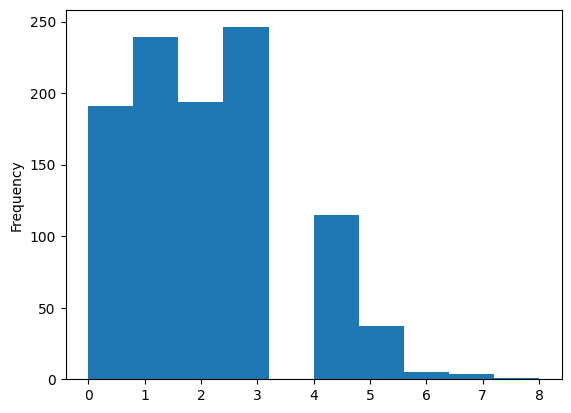

In [31]:
# Check distribution of 'rooms' again, with both single rooms and apartments now

df['rooms'].plot(kind='hist')

### 3. Focused data analysis

To recap:

###### **Questions for analysis and visualisation**
- Where are the rentals?
- Which borough is the rental in?
- What is the minimum, maximum, median and mean rent in each borough?
- What is the minimum, maximum, median and mean rent PER SQ METRE in each borough?
- What is the distribution of rooms, studios, 2 room apt, etc of each neighbourhood?

###### **Visualisations**
Initial ideas for visualisations:
- **Choropleth map**, showing most and least expensive boroughs in rent (maybe per sq m2? or per room?)
- **Symbol map**, showing the location of each rental (maybe)
- **Range plot**, showing the cheapest and most expensive rental in each borough
    - Or maybe in each neighbourhood?
    - Or both?
- **Bar chart**, showing each borough and their rent prices per sq metres, sorted
- **11 histograms**, showing the distribution of single, studious, 1 room apt etc. for each borough

###### **Questions and decisions to make**
- What do I want to tell?
    - Where can students afford to rent in Copenhagen
    - This is the most expensive borough in Copenhagen, this is the cheapest
    - Other angles??
- For the choropleth map, should I show:
    - The max rent per sq m2 for every type of room and apartment in each borough
    - The max rent for just one type of housing in each borough, e.g. single rooms or 2 room apartments
    - Something else
- What are your thoughts on the visualisations that I'm thinking about making?
    - Are there other options I haven't thought about?
    - Should some of them be changed?
    - Should some of them be dropped?

#### Basically, I need help to 1) pinpoint the angle and 2) decide what visualisations to make.


--
--

#### What is the minimum, maximum, median and mean rent in each borough?

In [32]:
# What is the minimum, maximum, median and mean rent in each borough?

df.groupby('borough')['monthly_rent'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Indre By,136.0,22322.238382,11103.368850,4000.0,15575.00,20550.0,27275.000,60000.0
Østerbro,93.0,15356.397849,6816.008293,3800.0,8000.00,16200.0,20000.000,32500.0
Amager Vest,216.0,14283.260787,7013.237905,3200.0,11466.25,13500.0,15963.250,55000.0
Amager Øst,94.0,12098.063830,6327.838816,4000.0,6800.00,10500.0,15862.500,35000.0
Vesterbro-Kongens Enghave,106.0,12212.248962,6196.445909,4500.0,7725.00,9550.0,16975.000,29000.0
Frederiksberg,101.0,11995.842574,6640.968770,4000.0,7000.00,9531.1,16200.000,32500.0
Nørrebro,39.0,10983.280000,7053.728312,3300.0,6050.00,9300.0,13600.000,33000.0
Brønshøj-Husum,48.0,9478.563750,3556.986105,2500.0,7375.00,8900.0,12410.015,16000.0
Vanløse,35.0,9764.971429,4279.158730,4000.0,6850.00,8700.0,12000.000,22000.0


In [33]:
# What is the minimum, maximum, median and mean size in each borough?

df.groupby('borough')['size_m2'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Indre By,136.0,117.963235,74.048774,9.0,74.50,114.0,153.00,421.0
Østerbro,93.0,74.537634,40.699738,7.0,34.00,75.0,103.00,171.0
Amager Vest,216.0,75.112500,38.200728,9.0,55.00,73.5,99.25,202.0
Amager Øst,94.0,61.925532,46.743003,8.0,31.00,47.0,85.00,338.0
Brønshøj-Husum,48.0,53.843750,30.608050,8.0,31.00,47.0,85.00,118.0
Vanløse,35.0,51.200000,35.854731,11.5,26.50,43.0,65.00,152.0
Nørrebro,39.0,53.589744,50.019848,6.0,13.00,42.0,70.50,200.0
Bispebjerg,39.0,52.641026,30.587654,10.0,32.50,41.0,75.50,115.0
Valby,125.0,52.256000,29.574374,7.0,34.00,38.0,68.00,136.0


In [34]:
# What is the minimum, maximum, median and mean rent for just rental_rooms in each borough?
df[df['category'] == 'rental_room'].groupby('borough')['monthly_rent'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Indre By,22.0,8075.409091,2067.364060,4000.0,6312.5,8000.0,9875.0,11000.0
Frederiksberg,31.0,6731.487097,2191.311766,4000.0,5450.0,6400.0,6675.0,14200.0
Amager Vest,28.0,5952.571429,1389.273709,3200.0,5000.0,6250.0,6787.5,8200.0
Vesterbro-Kongens Enghave,28.0,6575.942500,1705.546211,4500.0,5500.0,6100.0,7125.0,11200.0
Østerbro,20.0,6237.000000,1640.093386,3800.0,5275.0,6100.0,7175.0,10000.0
Nørrebro,18.0,5747.384444,1931.009676,3300.0,4125.0,6050.0,6475.0,11000.0
Valby,10.0,6239.000000,985.387121,5000.0,5550.0,5950.0,6875.0,8000.0
Bispebjerg,6.0,5650.000000,1914.941252,3400.0,4025.0,5700.0,7225.0,7900.0
Amager Øst,8.0,5718.750000,1630.498938,4000.0,4725.0,5350.0,6250.0,8950.0


In [35]:
# What is the minimum, maximum, median and mean size for just rental_rooms in each borough?
df[df['category'] == 'rental_room'].groupby('borough')['size_m2'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Brønshøj-Husum,11.0,19.181818,10.332649,8.0,12.000,20.0,21.00,43.0
Indre By,22.0,18.909091,10.262781,9.0,12.250,18.0,19.75,55.0
Østerbro,20.0,19.350000,8.449696,7.0,14.000,18.0,22.75,45.0
Frederiksberg,31.0,19.032258,12.451195,9.0,13.000,16.0,21.00,80.0
Vanløse,9.0,15.555556,3.600733,11.5,14.000,15.5,16.00,24.0
Vesterbro-Kongens Enghave,28.0,15.725000,6.146883,8.0,11.750,15.0,19.00,36.0
Amager Øst,8.0,20.375000,12.408954,8.0,12.000,14.5,27.50,42.0
Bispebjerg,6.0,13.333333,2.732520,10.0,11.250,13.5,15.00,17.0
Valby,10.0,16.600000,9.777525,7.0,11.250,13.5,19.00,38.0


#### What is the minimum, maximum, median and mean rent for each apartment size?

In [36]:
# Sum stats 1 br apt

df[(df['category'] == 'rental_apartment') & (df['rooms'] == 1)].describe()

,postal_code,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,lat,lng,formatted_address,available_from,rental_period,description,id
count,239.000000,239.000000,239.0,239.000000,236.000000,235.000000,239.000000,239.000000,0.0,223,239.000000,0.0,2.390000e+02
mean,2343.753138,35.280335,1.0,8481.665272,504.737288,2.544681,55.669113,12.546354,NaN,2024-08-06 08:30:08.071748864,0.552301,NaN,5.334105e+06
min,1264.000000,26.000000,1.0,5500.000000,0.000000,0.000000,55.640813,12.480737,NaN,2024-01-11 00:00:00,0.000000,NaN,8.698030e+05
25%,2300.000000,31.000000,1.0,7567.000000,400.000000,1.000000,55.651287,12.511556,NaN,2024-06-30 00:00:00,0.000000,NaN,5.330536e+06
50%,2400.000000,33.000000,1.0,8000.000000,500.000000,2.000000,55.664039,12.531084,NaN,2024-08-14 00:00:00,0.000000,NaN,5.429505e+06
75%,2500.000000,37.000000,1.0,9200.000000,600.000000,3.000000,55.681188,12.589771,NaN,2024-09-07 12:00:00,0.000000,NaN,5.441830e+06
max,2720.000000,106.000000,1.0,21000.000000,1374.000000,20.000000,55.721129,12.637565,NaN,2025-01-15 00:00:00,24.000000,NaN,5.447845e+06
std,246.660540,8.165879,0.0,1777.288255,182.630329,2.348195,0.021520,0.046970,NaN,NaN,2.749405,NaN,3.558336e+05


In [37]:
# Sum stats 2 br apt

df[(df['category'] == 'rental_apartment') & (df['rooms'] == 2)].describe()

,postal_code,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,lat,lng,formatted_address,available_from,rental_period,description,id
count,194.000000,194.000000,194.0,194.000000,190.000000,188.000000,194.000000,194.000000,0.0,168,194.000000,0.0,1.940000e+02
mean,2149.257732,68.829897,2.0,13559.522629,769.693421,2.484043,55.667947,12.560029,NaN,2024-08-17 09:42:51.428571392,4.793814,NaN,5.284361e+06
min,1063.000000,25.000000,2.0,6000.000000,0.000000,0.000000,55.617141,12.470772,NaN,2022-10-01 00:00:00,0.000000,NaN,2.539979e+06
25%,2100.000000,55.000000,2.0,11243.750000,600.000000,1.000000,55.649401,12.534080,NaN,2024-08-01 00:00:00,0.000000,NaN,5.256632e+06
50%,2300.000000,63.500000,2.0,12875.000000,779.625000,2.000000,55.667767,12.569843,NaN,2024-09-01 00:00:00,0.000000,NaN,5.429073e+06
75%,2300.000000,76.000000,2.0,15287.500000,1000.000000,4.000000,55.687383,12.582819,NaN,2024-09-30 06:00:00,6.000000,NaN,5.445602e+06
max,2900.000000,179.000000,2.0,34000.000000,3000.000000,18.000000,55.731307,12.636977,NaN,2025-01-15 00:00:00,24.000000,NaN,5.447818e+06
std,401.811488,22.869464,0.0,3547.141790,437.230882,2.419785,0.028507,0.038409,NaN,NaN,7.241845,NaN,3.387262e+05


In [38]:
# Sum stats 3 br apt

df[(df['category'] == 'rental_apartment') & (df['rooms'] == 3)].describe()

,postal_code,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,lat,lng,formatted_address,available_from,rental_period,description,id
count,246.000000,246.000000,246.0,246.000000,228.000000,241.000000,246.000000,246.000000,0.0,220,246.000000,0.0,2.460000e+02
mean,2116.012195,99.701220,3.0,18361.060976,1008.855263,2.755187,55.671187,12.562377,NaN,2024-08-18 21:42:32.727272704,5.000000,NaN,5.226211e+06
min,1051.000000,52.000000,3.0,6000.000000,0.000000,-1.000000,55.617762,12.459875,NaN,2023-08-01 00:00:00,0.000000,NaN,1.330394e+06
25%,2000.000000,84.000000,3.0,14010.000000,750.000000,1.000000,55.655867,12.543276,NaN,2024-08-01 00:00:00,0.000000,NaN,5.256150e+06
50%,2300.000000,95.000000,3.0,16725.000000,1000.000000,2.000000,55.671515,12.571874,NaN,2024-09-01 00:00:00,0.000000,NaN,5.430342e+06
75%,2300.000000,110.000000,3.0,21341.250000,1215.000000,4.000000,55.687821,12.587407,NaN,2024-10-01 00:00:00,6.000000,NaN,5.444754e+06
max,2900.000000,220.000000,3.0,50000.000000,5000.000000,15.000000,55.730962,12.631656,NaN,2025-06-01 00:00:00,24.000000,NaN,5.447810e+06
std,450.037980,26.028186,0.0,6388.747732,538.184533,2.297241,0.027197,0.035949,NaN,NaN,8.294084,NaN,5.062914e+05


In [39]:
# Sum stats 4 br apt

df[(df['category'] == 'rental_apartment') & (df['rooms'] == 4)].describe()

,postal_code,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,lat,lng,formatted_address,available_from,rental_period,description,id
count,115.000000,115.000000,115.0,115.000000,110.000000,115.000000,115.000000,115.000000,0.0,106,115.000000,0.0,1.150000e+02
mean,2099.686957,119.504348,4.0,20152.956522,1282.950000,3.034783,55.666423,12.568626,NaN,2024-08-14 14:43:01.132075520,3.182609,NaN,5.231827e+06
min,1058.000000,83.000000,4.0,10500.000000,0.000000,0.000000,55.616310,12.479557,NaN,2022-10-01 00:00:00,0.000000,NaN,1.685400e+06
25%,2000.000000,98.000000,4.0,16200.000000,1000.000000,1.000000,55.648021,12.554654,NaN,2024-08-01 00:00:00,0.000000,NaN,5.248710e+06
50%,2300.000000,111.000000,4.0,17900.000000,1200.000000,3.000000,55.665863,12.574697,NaN,2024-08-31 00:00:00,0.000000,NaN,5.428286e+06
75%,2300.000000,130.000000,4.0,21750.000000,1500.000000,4.000000,55.684134,12.583575,NaN,2024-09-30 00:00:00,0.000000,NaN,5.444949e+06
max,2900.000000,233.000000,4.0,55000.000000,3962.000000,13.000000,55.730962,12.634529,NaN,2025-04-14 00:00:00,24.000000,NaN,5.447900e+06
std,474.845799,29.204774,0.0,6460.885951,542.307371,2.270831,0.028015,0.035991,NaN,NaN,6.988189,NaN,4.952858e+05


In [40]:
# Sum stats 5 br apt

df[(df['category'] == 'rental_apartment') & (df['rooms'] == 5)].describe()

,postal_code,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,lat,lng,formatted_address,available_from,rental_period,description,id
count,37.000000,37.000000,37.0,37.000000,33.000000,36.000000,37.000000,37.000000,0.0,33,37.000000,0.0,3.700000e+01
mean,1987.081081,155.297297,5.0,26739.540541,1742.000000,2.361111,55.668961,12.566837,NaN,2024-08-09 01:27:16.363636480,6.162162,NaN,5.303291e+06
min,1052.000000,95.000000,5.0,15000.000000,0.000000,0.000000,55.618279,12.482121,NaN,2024-05-01 00:00:00,0.000000,NaN,4.549950e+06
25%,1820.000000,122.000000,5.0,19500.000000,1090.000000,1.750000,55.659074,12.544845,NaN,2024-07-19 00:00:00,0.000000,NaN,5.328151e+06
50%,2100.000000,152.000000,5.0,25000.000000,1400.000000,2.000000,55.678123,12.576297,NaN,2024-08-01 00:00:00,0.000000,NaN,5.437922e+06
75%,2300.000000,182.000000,5.0,33000.000000,2000.000000,3.000000,55.687016,12.589074,NaN,2024-09-01 00:00:00,12.000000,NaN,5.443813e+06
max,2720.000000,234.000000,5.0,50000.000000,9000.000000,4.000000,55.704691,12.633177,NaN,2024-10-01 00:00:00,24.000000,NaN,5.447824e+06
std,440.980875,38.586746,0.0,9034.464138,1426.713684,1.125110,0.025036,0.035817,NaN,NaN,8.658693,NaN,2.593274e+05


In [41]:
# Sum stats 6 br apt

df[(df['category'] == 'rental_apartment') & (df['rooms'] == 6)].describe()

,postal_code,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,lat,lng,formatted_address,available_from,rental_period,description,id
count,5.000000,5.0000,5.0,5.000000,4.000000,5.000000,5.000000,5.000000,0.0,3,5.00000,0.0,5.000000e+00
mean,1755.800000,279.2000,6.0,47283.400000,1825.000000,4.400000,55.680395,12.575002,NaN,2024-09-15 00:00:00,14.40000,NaN,4.954302e+06
min,1256.000000,149.0000,6.0,30000.000000,0.000000,2.000000,55.657841,12.538529,NaN,2024-07-14 00:00:00,0.00000,NaN,3.013801e+06
25%,1271.000000,202.0000,6.0,45000.000000,1125.000000,3.000000,55.676713,12.566649,NaN,2024-07-23 00:00:00,12.00000,NaN,5.434437e+06
50%,1852.000000,324.0000,6.0,46000.000000,1750.000000,3.000000,55.684993,12.585757,NaN,2024-08-01 00:00:00,12.00000,NaN,5.435688e+06
75%,2100.000000,330.0000,6.0,55417.000000,2450.000000,4.000000,55.689223,12.589799,NaN,2024-10-16 12:00:00,24.00000,NaN,5.442235e+06
max,2300.000000,391.0000,6.0,60000.000000,3800.000000,10.000000,55.693206,12.594278,NaN,2025-01-01 00:00:00,24.00000,NaN,5.445351e+06
std,476.632143,99.9985,0.0,11548.206692,1567.109866,3.209361,0.014013,0.022947,NaN,NaN,10.03992,NaN,1.084783e+06


#### What is the minimum, maximum, median and mean rent PER SQ METRE in each borough?

In [42]:
# Perform calculation monthly rent / size_m2 and save to a new column

df['rent_per_m2'] = df['monthly_rent']/df['size_m2']

df.head()


,postal_code,city_area,borough,title,category,size_m2,rooms,monthly_rent,monthly_rent_extra_costs,floor,...,formatted_address,advertised_date,available_from,rental_period,social_housing,is_newbuild,description,url,id,rent_per_m2
0,1569,København V,Indre By,Stort lyst værelse på 18 kvm med central beliggenhed,rental_room,18.0,0.0,7000.0,0.0,4.0,...,NaN,2024-07-21 18:29:02.796153+00:00,2024-08-01,0,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/18m2-1-vaer-id-5332664,5332664,388.888889
1,2000,Frederiksberg,Frederiksberg,Værelse til leje/Frederiksberg/ydre Nørrebro til kvindelig lejer,rental_room,14.0,0.0,4700.0,0.0,1.0,...,NaN,2024-07-21 17:58:51.245474+00:00,2024-09-01,6,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/14m2-1-vaer-id-5262404,5262404,335.714286
2,2100,København Ø,Østerbro,"Lækker, lys indflytningsklar 2-værelses lejlighed i det eftertragtede Klimakvarter på Østerbro med indflytning pr. 01/10/1024",rental_apartment,56.0,2.0,12400.0,1100.0,2.0,...,NaN,2024-07-21 14:51:34.333669+00:00,2024-10-01,0,False,False,NaN,/lejligheder/k%C3%B8benhavn/56m2-2-vaer-id-5184445,5184445,221.428571
3,1850,Frederiksberg C,Frederiksberg,Liebhaver lejlighed i hjertet af Frederiksberg,rental_apartment,111.0,4.0,25000.0,NaN,1.0,...,NaN,2024-07-21 12:03:22.882059+00:00,NaT,6,False,False,NaN,/lejligheder/k%C3%B8benhavn/111m2-4-vaer-id-5447900,5447900,225.225225
4,2100,København Ø,Østerbro,Fantastisk beliggenhed,rental_room,11.0,0.0,5500.0,0.0,5.0,...,NaN,2024-07-21 10:17:52.207751+00:00,2024-08-01,12,False,False,NaN,/v%C3%A6relser/k%C3%B8benhavn/11m2-1-vaer-id-5447889,5447889,500.000000


In [43]:
# What is the minimum, maximum, median and mean rent PER SQ METRE in each borough?

df.groupby('borough')['rent_per_m2'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Vesterbro-Kongens Enghave,106.0,281.603782,146.711421,127.358491,183.513514,253.506311,310.964912,975.000000
Frederiksberg,101.0,275.657395,127.295114,86.315789,195.783133,251.351351,295.454545,710.000000
Valby,125.0,233.841293,89.832703,112.500000,181.250000,231.428571,241.860465,757.142857
Nørrebro,39.0,303.938008,169.601293,84.507042,192.715947,225.000000,387.500000,785.714286
Vanløse,35.0,235.185824,81.935238,98.684211,180.666667,218.421053,270.000000,417.391304
Amager Øst,94.0,226.465306,76.383805,103.550296,185.322129,217.741935,234.488150,583.333333
Østerbro,93.0,242.425352,103.912721,105.263158,186.956522,212.045455,257.142857,714.285714
Indre By,136.0,242.166983,142.135685,116.250000,166.489362,198.353631,247.052719,925.000000
Brønshøj-Husum,48.0,213.554620,96.907369,105.424237,148.346657,190.639140,239.112903,637.500000


In [44]:
# What is the minimum, maximum, median and mean rent PER ROOM for apartments in each borough?

# Perform calculation monthly rent / rooms only for apartments and save to a new column
df['rent_per_room'] = df[df['category'] == 'rental_apartment']['monthly_rent']/df['rooms']

# Use .describe() to show summary stats for rent per room for each borough
df[df['category'] == 'rental_apartment'].groupby('borough')['rent_per_room'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Vesterbro-Kongens Enghave,78.0,7190.807692,1651.470630,4050.000000,5829.666667,7658.333333,8000.000000,11200.0
Valby,115.0,7027.260870,1822.718282,2775.000000,5200.000000,7600.000000,8200.000000,10700.0
Indre By,114.0,7820.214708,2697.548061,3900.000000,6166.666667,7500.000000,8813.500000,21000.0
Frederiksberg,70.0,6714.490476,1843.758667,2625.000000,5400.000000,6854.166667,7900.000000,10950.0
Vanløse,26.0,6688.769231,2403.735345,3000.000000,4541.666667,6850.000000,8100.000000,10850.0
Amager Øst,86.0,6797.835465,2025.798255,3333.333333,5415.916667,6750.000000,7499.375000,14500.0
Østerbro,73.0,6797.595075,1574.523712,3000.000000,5625.000000,6665.000000,7950.000000,10477.0
Nørrebro,21.0,6380.079365,1823.086171,2000.000000,5500.000000,6500.000000,7633.333333,9300.0
Bispebjerg,33.0,6288.015152,1403.587806,3000.000000,5044.666667,6300.000000,7000.000000,8900.0


#### Check how many of each apt type

In [45]:
df[df['category'] == 'rental_apartment']['rooms'].value_counts()

rooms
3.0    246
1.0    239
2.0    194
4.0    115
5.0     37
6.0      5
7.0      4
8.0      1
Name: count, dtype: int64

In [46]:
df[df['category'] == 'rental_room']['rooms'].value_counts()

rooms
0.0    191
Name: count, dtype: int64

### 4. Save data for visualisations

In [58]:
# Rent per sq metre for rental_rooms in each borough

room_rent_per_m2 = df[df['category'] == 'rental_room'].groupby('borough')['rent_per_m2'].describe().sort_values('50%', ascending=False)

room_rent_per_m2

room_rent_per_m2.to_csv('rent_per_m2_room.csv')

In [59]:
# Rent for rental_rooms in each borough

rent_room = df[df['category'] == 'rental_room'].groupby('borough')['monthly_rent'].describe().sort_values('50%', ascending=False)

rent_room.to_csv('rent_room.csv')

In [61]:
# Rent per sq metre for studio apt in each borough

rent_per_m2_studio = df[df['rooms'] == 1].groupby('borough')['rent_per_m2'].describe().sort_values('50%', ascending=False)

rent_per_m2_studio.to_csv('rent_per_m2_studio.csv')

In [62]:
# Rent for studio in each borough

rent_studio = df[df['rooms'] == 1].groupby('borough')['monthly_rent'].describe().sort_values('50%', ascending=False)

rent_studio.to_csv('rent_studio.csv')

In [64]:
df.groupby('category')['monthly_rent'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
rental_apartment,841.0,15339.118680,7767.173763,5500.0,9500.0,14000.0,18000.0,60000.0
rental_room,191.0,6341.316283,1897.068894,2500.0,5050.0,6000.0,7125.0,14200.0
